In [1]:
import os
import shutil
import numpy as np
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Copy File monilia from others dataset**

In [ ]:
import os
import shutil

source_folder = '/kaggle/input/enfermedades-cacao-yolov4/Enfermedades Cacao/Monilia'  # Replace with the source folder path
destination_folder = '/kaggle/working/cacao_disease/monilia'  # Replace with the destination folder path

# Check if the destination folder exists; if not, it will be created
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for filename in os.listdir(source_folder):
    source_file = os.path.join(source_folder, filename)  # Full path of the source file
    destination_file = os.path.join(destination_folder, filename)  # Full path of the destination file
    shutil.copy(source_file, destination_file)  # Copy the file to the destination folder
print('success')


**Delete file .txt in folder monilia**

In [3]:
import os

folder_path = '/kaggle/working/cacao_disease/monilia'  # Replace with the appropriate folder path

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):  # Check if the file ends with .txt
        file_path = os.path.join(folder_path, filename)  # Get the full path of the file
        os.remove(file_path)  # Delete the file


**Copy Files from source into working directory**

In [ ]:
import os
import shutil

# Function to copy files from one folder to another
def copy_files(source_folder, destination_folder, num_files):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Get a list of files from the source folder
    files = os.listdir(source_folder)
    
    # Ensure the number of files to be copied does not exceed the available files
    num_files = min(num_files, len(files))
    
    # Copy the specified number of files
    for file_name in files[:num_files]:
        source_file = os.path.join(source_folder, file_name)
        destination_file = os.path.join(destination_folder, file_name)
        shutil.copy2(source_file, destination_file)
    print("File copying successful")

# Specify the source folder, destination folder, and number of files to be copied
# Source Black Pod Rot
source_folder_BPR = '/kaggle/input/cacao-diseases/cacao_diseases/cacao_photos/black_pod_rot'
destination_folder_BPR = '/kaggle/working/cacao_disease/black_pod_rot'
num_files_to_copy_BPR = 943

# Source Healthy
source_folder_healthy = '/kaggle/input/cacao-diseases/cacao_diseases/cacao_photos/healthy'
destination_folder_healthy = '/kaggle/working/cacao_disease/healthy'
num_files_to_copy_healthy = 2500

# Execution
copy_files(source_folder_BPR, destination_folder_BPR, num_files_to_copy_BPR)
copy_files(source_folder_healthy, destination_folder_healthy, num_files_to_copy_healthy)


In [ ]:

# Counting the number of items in the folder
folder_path = '/kaggle/working/cacao_disease/black_pod_rot'
item = os.listdir(folder_path)
count = len(item)

print(f"Number of items in the folder: {count}")


In [6]:
import os
import shutil
import random

def split_data(dataset_dir, train_dir, val_dir, test_dir, split_ratio=(0.8, 0.1, 0.1)):
    # Check and delete subset directories if they already exist
    for directory in [train_dir, val_dir, test_dir]:
        if os.path.exists(directory):
            shutil.rmtree(directory)
    
    # Create train, validation, and test directories
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Get a list of image files from the dataset
    image_files = os.listdir(dataset_dir)
    random.shuffle(image_files)

    # Calculate the number of images based on the split ratio
    total_images = len(image_files)
    num_train = int(total_images * split_ratio[0])
    num_val = int(total_images * split_ratio[1])
    num_test = total_images - num_train - num_val

    # Move images into each subset
    for i, image_file in enumerate(image_files):
        src_path = os.path.join(dataset_dir, image_file)
        if i < num_train:
            dst_path = os.path.join(train_dir, image_file)
        elif i < num_train + num_val:
            dst_path = os.path.join(val_dir, image_file)
        else:
            dst_path = os.path.join(test_dir, image_file)
        shutil.copy(src_path, dst_path)

    print("Splitting data completed.")


In [7]:
# Define paths
black_pod_rot_SRC_DIR = "/kaggle/working/cacao_disease/black_pod_rot"
# pod_borer_SRC_DIR = "/kaggle/working/cacao_disease/pod_borer"
monilia_SRC_DIR = "/kaggle/working/cacao_disease/monilia"
healthy_SRC_DIR = "/kaggle/working/cacao_disease/healthy"

TRAINING_DIR = "/kaggle/working/training"
VALIDATION_DIR = "/kaggle/working/validation"
TEST_DIR = "/kaggle/working/test"

TRAINING_BPR_DIR = os.path.join(TRAINING_DIR, "black_pod_rot/")
VALIDATION_BPR_DIR = os.path.join(VALIDATION_DIR, "black_pod_rot/")
TEST_BPR_DIR = os.path.join(TEST_DIR, "black_pod_rot/")

# TRAINING_PB_DIR = os.path.join(TRAINING_DIR, "pod_borer/")
# VALIDATION_PB_DIR = os.path.join(VALIDATION_DIR, "pod_borer/")
# TEST_PB_DIR = os.path.join(TEST_DIR, "pod_borer/")

TRAINING_M_DIR = os.path.join(TRAINING_DIR, "monilia/")
VALIDATION_M_DIR = os.path.join(VALIDATION_DIR, "monilia/")
TEST_M_DIR = os.path.join(TEST_DIR, "monilia/")

TRAINING_HEALTHY_DIR = os.path.join(TRAINING_DIR, "healthy/")
VALIDATION_HEALTHY_DIR = os.path.join(VALIDATION_DIR, "healthy/")
TEST_HEALTHY_DIR = os.path.join(TEST_DIR, "healthy/")

# create directory

# if not os.path.exists(TRAINING_DIR):
#   os.makedirs(TRAINING_DIR)
# if not os.path.exists(VALIDATION_DIR):
#   os.makedirs(VALIDATION_DIR)
# if not os.path.exists(TEST_DIR):
#   os.makedirs(TEST_DIR)

# Define proportion of images used for training
train_size = 0.8
val_size = 0.1
test_size = 0.1

split_data(black_pod_rot_SRC_DIR, 
           TRAINING_BPR_DIR, 
           VALIDATION_BPR_DIR, 
           TEST_BPR_DIR, 
           split_ratio=(train_size,val_size, test_size))
# split_data(pod_borer_SRC_DIR, 
#            TRAINING_PB_DIR, 
#            VALIDATION_PB_DIR, 
#            TEST_PB_DIR, 
#            split_ratio=(train_size,val_size, test_size))
split_data(healthy_SRC_DIR, 
           TRAINING_HEALTHY_DIR, 
           VALIDATION_HEALTHY_DIR, 
           TEST_HEALTHY_DIR, 
           split_ratio=(train_size,val_size, test_size))

split_data(monilia_SRC_DIR, 
           TRAINING_M_DIR, 
           VALIDATION_M_DIR, 
           TEST_M_DIR, 
           split_ratio=(train_size,val_size, test_size))

Splitting data completed.
Splitting data completed.
Splitting data completed.


In [8]:

print(f"\n\nOriginal Black Pod Rot directory has {len(os.listdir(black_pod_rot_SRC_DIR))} images")
# print(f"Original Pod Borer directory has {len(os.listdir(pod_borer_SRC_DIR))} images")
print(f"Original Healthy directory has {len(os.listdir(healthy_SRC_DIR))} images")
print(f"Original Monilia directory has {len(os.listdir(monilia_SRC_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_BPR_DIR))} images of Black Pod Rot for training")
# print(f"There are {len(os.listdir(TRAINING_PB_DIR))} images of Pod Borer for training")
print(f"There are {len(os.listdir(TRAINING_HEALTHY_DIR))} images ofHealthy for training")
print(f"There are {len(os.listdir(TRAINING_M_DIR))} images of Monilia for training\n")

print(f"There are {len(os.listdir(VALIDATION_BPR_DIR))} images of Black Pod Rot for validation")
# print(f"There are {len(os.listdir(VALIDATION_PB_DIR))} images of Pod Borer for validation")
print(f"There are {len(os.listdir(VALIDATION_HEALTHY_DIR))} images of Healthy for validation")
print(f"There are {len(os.listdir(VALIDATION_M_DIR))} images of Monilia for validation\n")

print(f"There are {len(os.listdir(TEST_BPR_DIR))} images of Black Pod Rot for test")
# print(f"There are {len(os.listdir(TEST_PB_DIR))} images of Pod Borer for test")
print(f"There are {len(os.listdir(TEST_HEALTHY_DIR))} images of Healthy for test")
print(f"There are {len(os.listdir(TEST_M_DIR))} images of Monilia for test")



Original Black Pod Rot directory has 943 images
Original Healthy directory has 2500 images
Original Monilia directory has 105 images

There are 754 images of Black Pod Rot for training
There are 2000 images ofHealthy for training
There are 84 images of Monilia for training

There are 94 images of Black Pod Rot for validation
There are 250 images of Healthy for validation
There are 10 images of Monilia for validation

There are 95 images of Black Pod Rot for test
There are 250 images of Healthy for test
There are 11 images of Monilia for test


In [9]:

def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR):
    train_datagen = ImageDataGenerator(
                                    rescale=1. / 255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                     )
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode='categorical',
                                                      target_size=(250,250))
    validation_datagen = ImageDataGenerator(rescale=1.0/255)
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=10,
                                                                class_mode='categorical',
                                                                target_size=(250,250))
    test_datagen = ImageDataGenerator(rescale=1.0/255)
    test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                                batch_size=10,
                                                                class_mode='categorical',
                                                                target_size=(250,250),
                                                                shuffle=False)
    return train_generator, validation_generator, test_generator

In [10]:
train_generator, validation_generator, test_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR)

Found 2838 images belonging to 3 classes.
Found 354 images belonging to 3 classes.
Found 356 images belonging to 3 classes.


In [11]:
# Print label
class_labels = train_generator.class_indices
print(class_labels)

{'black_pod_rot': 0, 'healthy': 1, 'monilia': 2}


In [12]:
from tensorflow.keras.optimizers import Adam
def create_model():
    model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250,250,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
  ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

In [13]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 248, 248, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     256       
 hNormalization)                                                 
                                                        

In [14]:
#Train


# create checkpoint
checkpoint = ModelCheckpoint('model_tertinggi.h5', monitor='accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(train_generator,
                    epochs=30,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[checkpoint])

Epoch 1/30
284/284 [==============================] - ETA: 0s - loss: 0.9035 - accuracy: 0.6942
Epoch 1: accuracy improved from -inf to 0.69415, saving model to model_tertinggi.h5
284/284 [==============================] - 88s 277ms/step - loss: 0.9035 - accuracy: 0.6942 - val_loss: 14.8301 - val_accuracy: 0.7062
Epoch 2/30
284/284 [==============================] - ETA: 0s - loss: 0.6052 - accuracy: 0.7449
Epoch 2: accuracy improved from 0.69415 to 0.74489, saving model to model_tertinggi.h5
284/284 [==============================] - 77s 270ms/step - loss: 0.6052 - accuracy: 0.7449 - val_loss: 0.5650 - val_accuracy: 0.8107
Epoch 3/30
284/284 [==============================] - ETA: 0s - loss: 0.5479 - accuracy: 0.7572
Epoch 3: accuracy improved from 0.74489 to 0.75722, saving model to model_tertinggi.h5
284/284 [==============================] - 76s 267ms/step - loss: 0.5479 - accuracy: 0.7572 - val_loss: 0.4953 - val_accuracy: 0.7994
Epoch 4/30
284/284 [==============================]

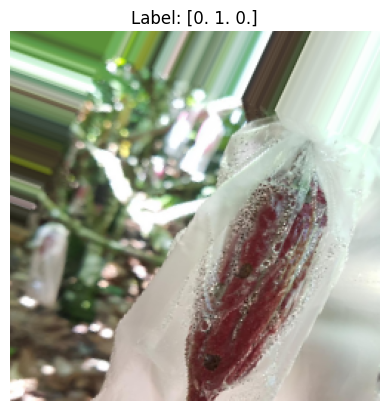

In [15]:
# Get a single batch of images from train_generator
batch = train_generator.next()

# Get the array of images and their labels from the batch
images = batch[0]
labels = batch[1]

# Select a random index to display an image
random_index = np.random.randint(0, images.shape[0])

# Get the image and label with the random index
image = images[random_index]
label = labels[random_index]

# Display the image
plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


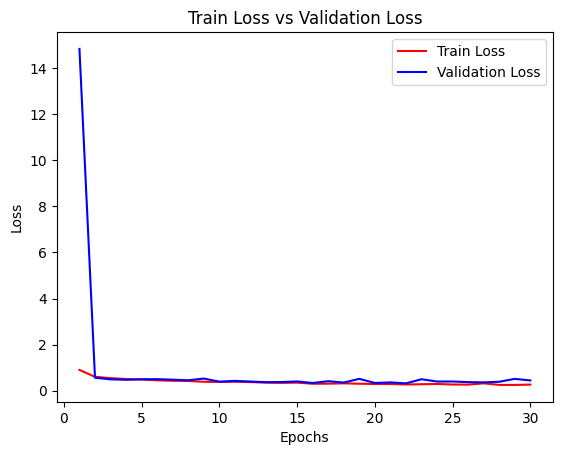

In [16]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot train loss dan validation loss
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

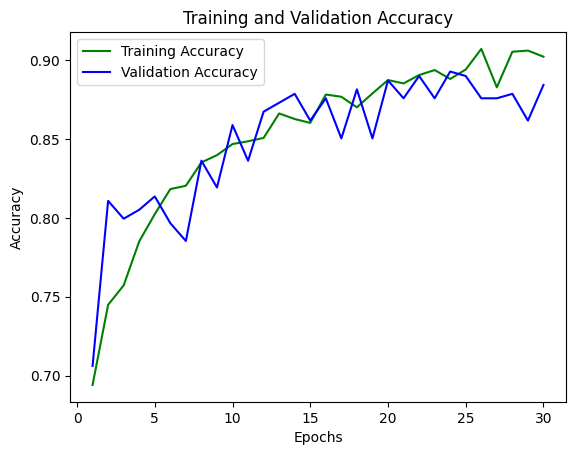

In [17]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Model evaluation
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

best_model = load_model('model_tertinggi.h5')
val_loss, val_acc = best_model.evaluate(test_generator)
print('Validation Loss: ', val_loss)
print('Validation Accuracy: ', val_acc)


36/36 [==============================] - 5s 142ms/step - loss: 0.3343 - accuracy: 0.9017
Validation Loss:  0.33434879779815674
Validation Accuracy:  0.9016854166984558


In [ ]:
# Function to make predictions on an image file
def predict_image(file):
    img = image.load_img(file, target_size=(250, 250))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    prediction = best_model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_probability = np.max(prediction)
    
    return predicted_class_index, predicted_probability

# File
uploaded_file = '/kaggle/input/test-data/test cocoa/black_pod_rot/black_pod_rot_94.jpg'

# Prediction on the image file
predicted_class_index, predicted_probability = predict_image(uploaded_file)

if predicted_class_index == 0:
    result = 'Back Pod Rot'
elif predicted_class_index == 1:
    result = 'Healthy'
else:
    result = 'Pod Borer'

print("Prediction result:", result)
print("Prediction probability:", predicted_probability)


In [20]:
from sklearn.metrics import classification_report

# Collecting model predictions for the test data
y_pred = best_model.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

# Getting the true labels from the generator
y_true_labels = test_generator.classes

# Getting the class names from the generator
class_names = list(test_generator.class_indices.keys())

# Creating the classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)

# Displaying the classification report
print(report)


36/36 [==============================] - 5s 138ms/step
               precision    recall  f1-score   support

black_pod_rot       0.82      0.84      0.83        95
      healthy       0.94      0.92      0.93       250
      monilia       0.85      1.00      0.92        11

     accuracy                           0.90       356
    macro avg       0.87      0.92      0.89       356
 weighted avg       0.90      0.90      0.90       356



In [21]:
y_true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
y_pred_labels

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,